In [1]:
import numpy
import pandas
from IPython.display import display
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data from csv generated by make_dataset.ipynb
myDataFrame = pandas.read_csv("regression_dataset.csv")

# just remove the extra index marked
del myDataFrame["Unnamed: 0"]

display(myDataFrame)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Y
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549,-143.558623
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376,195.906051
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190,-283.127373
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621,65.515396
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575,-350.453567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.612174,0.810953,-0.040851,-0.566625,0.629443,0.617884,-0.656258,2.056335,1.735905,-0.819086,...,0.403496,0.420944,-0.391437,-0.618937,0.922930,0.784517,0.751371,-1.061555,-0.651633,-83.591367
48996,1.026413,0.462496,0.906411,-0.091527,-1.439803,-0.838229,-1.749011,1.456286,0.098714,-2.212266,...,0.806000,-0.963759,-1.206119,-0.566116,-1.387706,0.129589,-0.420652,0.502607,0.157136,84.634558
48997,-0.964933,-0.218802,1.006998,-2.051831,-0.294041,-0.227723,0.635877,-0.224971,-1.254820,0.186860,...,-0.952674,2.478454,1.607402,0.393220,1.083309,-0.602386,-0.079547,-0.584053,0.518906,-30.708701
48998,1.784331,0.483905,-1.572399,0.445804,0.745019,0.449407,-2.001772,-0.437973,0.228762,-1.536932,...,-1.625841,-0.854899,-0.141347,-0.158472,2.324765,-1.767596,0.144070,0.857798,-0.773464,-329.432270


<br>

<br>

<br>

# DATA CLEANING

In [3]:
# remove null values
myDataFrame.dropna(inplace=True)
display(myDataFrame)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Y
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549,-143.558623
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376,195.906051
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190,-283.127373
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621,65.515396
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575,-350.453567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.612174,0.810953,-0.040851,-0.566625,0.629443,0.617884,-0.656258,2.056335,1.735905,-0.819086,...,0.403496,0.420944,-0.391437,-0.618937,0.922930,0.784517,0.751371,-1.061555,-0.651633,-83.591367
48996,1.026413,0.462496,0.906411,-0.091527,-1.439803,-0.838229,-1.749011,1.456286,0.098714,-2.212266,...,0.806000,-0.963759,-1.206119,-0.566116,-1.387706,0.129589,-0.420652,0.502607,0.157136,84.634558
48997,-0.964933,-0.218802,1.006998,-2.051831,-0.294041,-0.227723,0.635877,-0.224971,-1.254820,0.186860,...,-0.952674,2.478454,1.607402,0.393220,1.083309,-0.602386,-0.079547,-0.584053,0.518906,-30.708701
48998,1.784331,0.483905,-1.572399,0.445804,0.745019,0.449407,-2.001772,-0.437973,0.228762,-1.536932,...,-1.625841,-0.854899,-0.141347,-0.158472,2.324765,-1.767596,0.144070,0.857798,-0.773464,-329.432270


In [4]:
# remove outliers
# outliers in a cols have z score more than 3
from scipy import stats

# function to remove outlier
# drops the row where their is a outlier in col = col_name
def remove_outlier(df_in, col_name):
	df_out = df_in[(numpy.abs(stats.zscore(df_in[col_name])) < 3)]
	return df_out

In [5]:
# remove outlier from every col expect Y
for i in myDataFrame.columns:
    if(i != "Y"):
        myDataFrame = remove_outlier(myDataFrame , i)
    else:
        print("excluding Y")

display(myDataFrame)

excluding Y


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Y
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549,-143.558623
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376,195.906051
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190,-283.127373
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621,65.515396
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575,-350.453567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48990,0.406378,-1.007585,-1.877343,-0.366038,0.916368,-1.320777,1.249626,-0.546454,-1.688592,-0.588754,...,0.480706,0.147506,0.785811,1.201976,0.560697,-1.433081,1.380681,1.433602,1.501855,72.496734
48991,1.126919,-1.814636,-1.676663,1.198500,1.968953,-0.120843,-0.291868,0.176994,0.163470,-1.308102,...,2.040239,-0.542568,-0.699610,-1.114676,0.845404,0.792848,-0.976540,0.442420,1.320272,-728.098320
48992,1.240606,0.988432,1.156910,1.108356,0.080162,-1.431124,-0.126508,0.053366,-1.229148,-0.138021,...,1.402057,0.628338,0.577898,0.508616,1.310424,0.786410,-0.461037,0.215546,-0.685160,-113.086876
48993,-1.176970,0.979784,-0.973810,-0.053065,0.221367,0.378686,0.071510,1.285031,-0.207942,2.595162,...,0.482363,0.204353,0.902717,0.826890,-0.603931,0.806070,-0.812932,-1.843792,-0.221233,398.523659


In [6]:
# export cleaned data to CSV for further use
# when you want to fit the PCA for Standard scaler again while implementing model
myDataFrame.to_csv("regression_dataset_cleaned.csv")

<br>

<br>

<br>

<br>

# DATA TRANSFORMATION

In [7]:
# seperate X and Y data frame as X only need to be reduced
yDataFrame = pandas.DataFrame(myDataFrame["Y"] , columns=["Y"])
del myDataFrame["Y"]

display(yDataFrame)
display(myDataFrame)

,Y
0,-143.558623
1,195.906051
2,-283.127373
3,65.515396
4,-350.453567
...,...
48990,72.496734
48991,-728.098320
48992,-113.086876
48993,398.523659


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.167102,0.083154,-0.096406,-0.801275,1.075555,-1.201153,1.024261,-0.156954,-0.708645,-0.196538,...,-0.631991,0.373473,2.707060,0.306216,1.501089,-0.493836,-0.246135,-0.636201,0.089094,-1.682549
1,-0.512651,1.323049,0.949039,0.576558,-0.488942,-0.251837,0.253511,0.281716,-0.870402,-0.518713,...,-0.221306,0.959889,-1.340798,1.227776,2.181582,1.249119,0.230329,0.599645,-2.319698,0.888376
2,0.649028,-0.963108,-0.565901,0.413303,-0.736864,0.461006,0.368180,0.449813,1.818493,-0.876157,...,-0.776247,0.600717,0.851653,1.864656,-1.118712,-0.200831,1.327365,2.192438,0.343725,1.427190
3,0.076677,1.409741,1.442789,0.233455,0.794616,-0.880256,-0.688355,1.671363,0.601832,-1.103449,...,-0.720930,0.180008,0.225265,0.420292,-2.879107,-0.066227,-0.327131,1.930428,0.813451,-1.793621
4,2.273977,2.266482,0.233081,-1.150010,0.412494,-0.380218,0.376578,0.406999,1.790466,0.617896,...,1.096006,0.152225,-0.126380,-1.042323,2.001433,0.451981,-0.376933,-0.328805,-1.222329,0.502575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48990,0.406378,-1.007585,-1.877343,-0.366038,0.916368,-1.320777,1.249626,-0.546454,-1.688592,-0.588754,...,0.343203,0.480706,0.147506,0.785811,1.201976,0.560697,-1.433081,1.380681,1.433602,1.501855
48991,1.126919,-1.814636,-1.676663,1.198500,1.968953,-0.120843,-0.291868,0.176994,0.163470,-1.308102,...,1.934495,2.040239,-0.542568,-0.699610,-1.114676,0.845404,0.792848,-0.976540,0.442420,1.320272
48992,1.240606,0.988432,1.156910,1.108356,0.080162,-1.431124,-0.126508,0.053366,-1.229148,-0.138021,...,1.072057,1.402057,0.628338,0.577898,0.508616,1.310424,0.786410,-0.461037,0.215546,-0.685160
48993,-1.176970,0.979784,-0.973810,-0.053065,0.221367,0.378686,0.071510,1.285031,-0.207942,2.595162,...,0.257870,0.482363,0.204353,0.902717,0.826890,-0.603931,0.806070,-0.812932,-1.843792,-0.221233


In [8]:
# normalize the X and Y
from sklearn.preprocessing import StandardScaler

scalerObjX = StandardScaler()
scalerObjY = StandardScaler()

scalerObjX.fit(myDataFrame)
scalerObjY.fit(yDataFrame)

StandardScaler()

In [9]:
xScaled = scalerObjX.transform(myDataFrame)
yScaled = scalerObjY.transform(yDataFrame)

# new Dataframe for the Normalized X and Y
xScaledDF = pandas.DataFrame(xScaled , columns = myDataFrame.columns)
yScaledDF = pandas.DataFrame(yScaled , columns = yDataFrame.columns)

display(xScaledDF)
display(yScaledDF)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.165539,0.092824,-0.095574,-0.819434,1.092100,-1.229377,1.044848,-0.169233,-0.712691,-0.203820,...,-0.642512,0.371342,2.736028,0.320793,1.509028,-0.505002,-0.244101,-0.653594,0.088675,-1.709536
1,-0.521701,1.355009,0.966547,0.581375,-0.494405,-0.265430,0.259559,0.274449,-0.877180,-0.530678,...,-0.226312,0.962909,-1.360942,1.254770,2.194941,1.257721,0.239486,0.607758,-2.375454,0.900667
2,0.652772,-0.972245,-0.572559,0.415399,-0.745814,0.458401,0.376391,0.444466,1.857130,-0.893318,...,-0.788706,0.600583,0.858109,1.900230,-1.131638,-0.208673,1.352926,2.233423,0.349155,1.447713
3,0.074118,1.443259,1.468174,0.232551,0.807209,-0.903534,-0.700073,1.679971,0.619919,-1.123913,...,-0.732646,0.176178,0.224121,0.436406,-2.906054,-0.072543,-0.326309,1.966005,0.829672,-1.822306
4,2.295617,2.315402,0.239169,-1.173985,0.419711,-0.395789,0.384948,0.401163,1.828630,0.622451,...,1.108691,0.148151,-0.131790,-1.045915,2.013357,0.451542,-0.376856,-0.339854,-1.252876,0.508972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,0.407450,-1.017522,-1.904922,-0.376939,0.930673,-1.350845,1.274464,-0.563182,-1.709190,-0.601737,...,0.345778,0.479517,0.145419,0.806849,1.207532,0.561491,-1.448796,1.404913,1.464070,1.523519
32522,1.135927,-1.839081,-1.701041,1.213690,1.998065,-0.132417,-0.296106,0.168530,0.174154,-1.331541,...,1.958441,2.052749,-0.553028,-0.698585,-1.127570,0.849427,0.810417,-1.000957,0.450118,1.339162
32523,1.250865,1.014377,1.177735,1.122042,0.082704,-1.462892,-0.127627,0.043490,-1.241985,-0.144453,...,1.084420,1.408961,0.632084,0.596135,0.508650,1.319721,0.803882,-0.474815,0.218032,-0.696909
32524,-1.193335,1.005573,-0.986975,-0.058747,0.225896,0.374812,0.074126,1.289225,-0.203531,2.628457,...,0.259299,0.481188,0.202956,0.925330,0.829460,-0.616345,0.823836,-0.833972,-1.888616,-0.225894


,Y
0,-0.528919
1,0.708283
2,-1.037587
3,0.233065
4,-1.282962
...,...
32521,0.258509
32522,-2.659314
32523,-0.417863
32524,1.446737


<br>

<br>

<br>

<br>

# DATA REDUCTION

<BarContainer object of 142 artists>

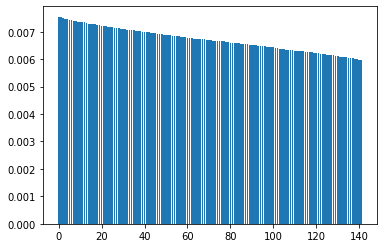

In [10]:
# apply PCA to keep 95% of the variance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# keeping 95% variance
pcaObj = PCA(n_components=0.95)

pcaObj.fit(xScaledDF)

explained_variance = list(pcaObj.explained_variance_ratio_)

plt.bar(range(len(explained_variance)), explained_variance,align='center')

In [11]:
reducedX = pcaObj.transform(xScaledDF)

display(reducedX)

# total number of final cols
print(len(reducedX[0]))

array([[-0.14755782, -0.92592568, -1.02523945, ..., -0.60538193,
        -0.02837672, -0.94227024],
       [ 0.53438095,  0.96963618,  1.00149889, ...,  3.02963873,
        -0.83918556, -1.5160526 ],
       [ 0.4406296 ,  0.12690051, -0.59015283, ..., -0.62748041,
         0.46614127,  0.98207402],
       ...,
       [ 0.36648287,  1.62351725,  0.96027603, ..., -0.0437729 ,
        -1.32790787, -0.41163579],
       [-0.09523624, -0.58965639, -1.06838517, ..., -0.35751565,
         0.84728856, -0.16375763],
       [-0.77596796,  0.41938063, -0.43154562, ...,  1.57545182,
        -0.39484665, -1.29818777]])

142


In [12]:
# form complete Df from reduced X and Y
reducedDf = pandas.DataFrame(reducedX , columns=list(range(len(reducedX[0]))))

reducedDf["Y"] = yScaledDF["Y"]

display(reducedDf)

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,Y
0,-0.147558,-0.925926,-1.025239,-0.887998,-0.307809,-0.423870,1.157292,-1.225745,1.125616,-1.314981,...,0.224421,-0.538830,-0.425232,-0.024168,1.407233,0.881007,-0.605382,-0.028377,-0.942270,-0.528919
1,0.534381,0.969636,1.001499,-0.061806,-1.326246,-0.463337,0.186305,1.561357,-1.775620,0.529774,...,-0.992282,-0.657263,0.658024,-1.398717,-2.202777,0.613039,3.029639,-0.839186,-1.516053,0.708283
2,0.440630,0.126901,-0.590153,0.217886,-0.491499,-0.069370,0.699608,-1.294567,0.922904,-0.487972,...,-1.247943,0.911206,-0.682931,-0.162296,1.268259,1.168051,-0.627480,0.466141,0.982074,-1.037587
3,1.282010,0.639371,0.846455,0.044714,-0.276311,2.063746,-0.004700,-0.107965,-0.955539,1.035031,...,-0.459294,1.219639,0.208733,-0.915176,1.899920,1.401097,0.234683,-0.696320,0.128595,0.233065
4,1.683534,-0.412452,0.773220,-0.511548,-0.632633,-0.969455,-0.230028,1.184504,1.243623,-0.498263,...,0.484628,1.548128,-0.454314,-0.907162,-0.081113,0.018581,-0.446069,1.796722,-0.251313,-1.282962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,-0.236113,0.981611,-0.367887,0.263010,-1.123344,-0.826430,1.740163,0.868408,0.093125,1.025686,...,1.213069,0.790532,-1.283021,-1.384059,-1.560485,-0.827148,0.028065,0.407055,0.565272,0.258509
32522,-0.656993,-0.606283,2.002399,-0.478756,2.650515,1.688916,-1.085761,-1.988725,0.366193,-0.511284,...,-0.758998,0.413443,-3.370927,0.047441,-0.683448,-0.777967,0.031908,0.657787,0.013795,-2.659314
32523,0.366483,1.623517,0.960276,-1.283430,0.986536,-0.047104,-0.073333,1.295788,-0.708664,-1.171222,...,0.259115,-0.917506,-0.794817,0.075424,0.330865,-0.706029,-0.043773,-1.327908,-0.411636,-0.417863
32524,-0.095236,-0.589656,-1.068385,1.312359,0.101757,0.619537,-0.463122,0.448628,0.273055,1.556792,...,0.603416,0.118438,1.863083,-0.806380,-0.643810,1.178476,-0.357516,0.847289,-0.163758,1.446737


In [13]:
# export reduced X to csv for further use 
reducedDf.to_csv("regression_dataset_reduced.csv")